In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams #global property change
rcParams.update({  'axes.labelsize': 22,
                            'font.size': 8,
                            'legend.fontsize': 16,
                            'xtick.labelsize': 18,
                            'ytick.labelsize': 18,
                            'figure.figsize': [10, 8]})

# (x,y,error)

plt.gca(): get current axis (equiv. ax=plt.subplot(111)) <br/>
plt.gca()._get_lines.color_cycle.next():  cycle through colors <br/>
p[0].get_color(): get the color used by previous e.g. p=plt.plot(...)

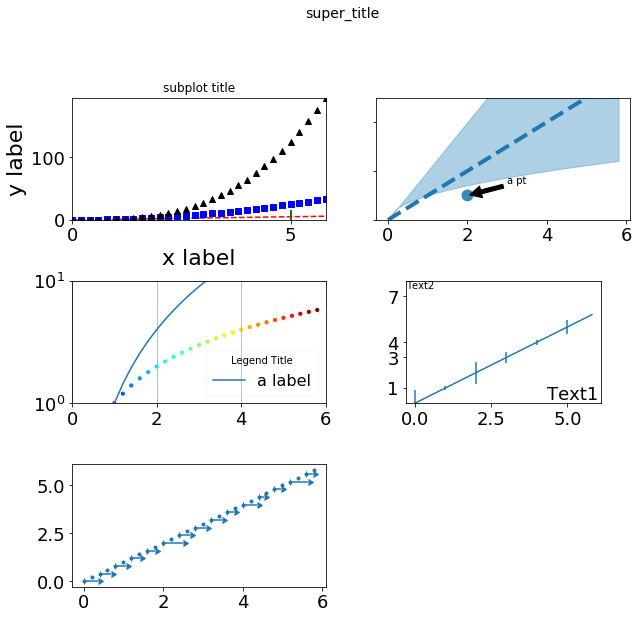

In [2]:
t = np.arange(0., 6., 0.2);
fig=plt.figure(1,figsize=(10,9))

p1=plt.subplot(3,2,1)  #comma not necessary if all numbers<10;   equiv. fig.add_subplot(221)
plt.xlabel("x label") #equiv. p1.set_xlabel
plt.ylabel("y label")
line1,line2,line3=plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'k^') #'k'=black
plt.axis([0, 6, 0, 20])
plt.autoscale(tight=True) #scaling x&y axis to tight
plt.vlines(5, 0, 15, color="g", linestyles="-.", lw=2) #a line from (5,0) to (5,15)
plt.title('subplot title')
plt.locator_params(axis='x',nbins=2) # number of intervals to make for x-axis

sp=plt.subplot(322)
line, = plt.plot(t, t, lw=4,ls="--") #linewidth
plt.scatter(2,1, s=140, c="#348ABD",edgecolor="none")
plt.annotate('a pt', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(0,5)
plt.fill_between(t, 2*t, np.sqrt(t), color="#348ABD", alpha=0.4) #between the lines 2t (default 0) and sqrt(t)
plt.setp(sp.get_yticklabels(), visible=False) # equiv. sp.yaxis.set_ticklabels([])

plt.subplot(323)
plt.plot(t,t**2, label='a label')
plt.scatter(t,t,s=10,c=t,cmap=plt.cm.jet) #s=size;colored according to c with cmap
plt.yscale('symlog', linthreshy=0.05) #or 'log','linear'
plt.grid(True)
leg=plt.legend(loc='best', title="Legend Title") #'upper left','lower right'
leg.get_frame().set_alpha(0.15)  #set transparency of the frame of legend
plt.axis([0, 6, 1, 10])

p4=fig.add_subplot(324)
p4.errorbar(t,t,np.random.uniform(0,1,len(t)),errorevery=5)
p4.set_yticks([1,3,4,7])
p4.set_ylim([0,8])
p4.set_aspect(.5)
p4.text(6, 0, r'Text1',verticalalignment='bottom', horizontalalignment='right',color='black', fontsize=18)
p4.text(0, 1, r'Text2',va='top', ha='left',transform=p4.transAxes)  #scaled coordinates

fig.add_subplot(325)
plt.errorbar(t,t,
             xerr=np.random.uniform(0,.5,np.shape(t)[0]),yerr=None,
             xlolims=True, #arrows on the error limits
             errorevery=2,
             capsize=3, #length of the error bar caps in points
             fmt='.')

fig.subplots_adjust(hspace=0.5)
plt.suptitle("super_title", y=1.02, fontsize=14) #y=0:bottom; y=1:top
# plt.tight_layout()  #make all axes labels visible
plt.show()

# Bars

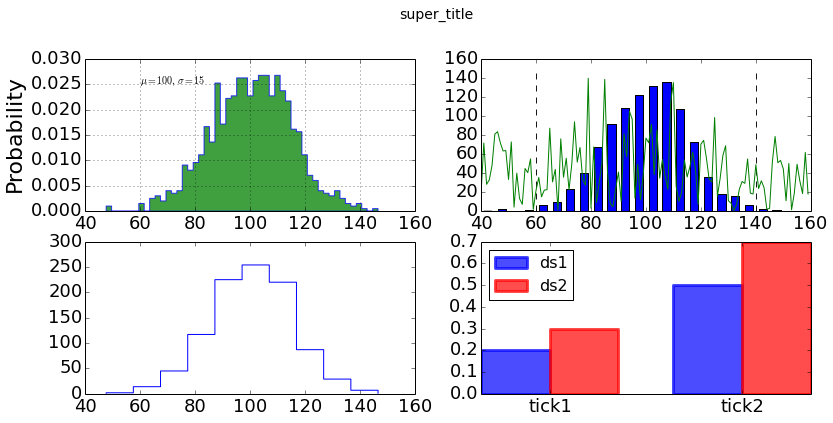

In [38]:
plt.figure(1,figsize=(13,6))
x = 100 + 15 * np.random.randn(1000)

plt.subplot(221)
n, bins, patches = plt.hist(x, bins=50, normed=True,alpha=0.75, facecolor='g',edgecolor='b',histtype='stepfilled')
plt.xlabel('x'); plt.ylabel('Probability')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03]) # plt.xlim([40, 160]);  plt.ylim([0,0.03]); 
plt.grid(True)

plt.subplot(222)
plt.hist(x, bins=np.arange(40,160,5),weights=np.ones_like(x),rwidth=.6)#can have uneven binning; can have uneven weights, bars fill 80% of x-axis
plt.plot(np.arange(40,160),50*np.abs(np.random.randn(120)))
plt.vlines([60, 140], [0, 0], [150,150], alpha=0.9,linestyles='--')

plt.subplot(223)
plt.hist(x, histtype='step')#can have uneven binning; can have uneven weights, bars fill 80% of x-axis

plt.subplot(224)
plt.bar([0, 0.7], [0.2, 0.5],    alpha=0.7, width=0.25, color='b', edgecolor='b',  label="ds1", lw="3") # lower-left coords; heights; lw: for border
plt.bar([0.25, .95], [0.3, 0.7], alpha=0.7, width=0.25, color='r', edgecolor='r',   label="ds2", lw="3")
plt.xticks([0.25, .95], ["tick1", "tick2"])  #otherwise automatic
plt.legend(loc="best")

plt.suptitle("super_title", y=1.02, fontsize=14)
plt.show()

# Contour/Density Plots

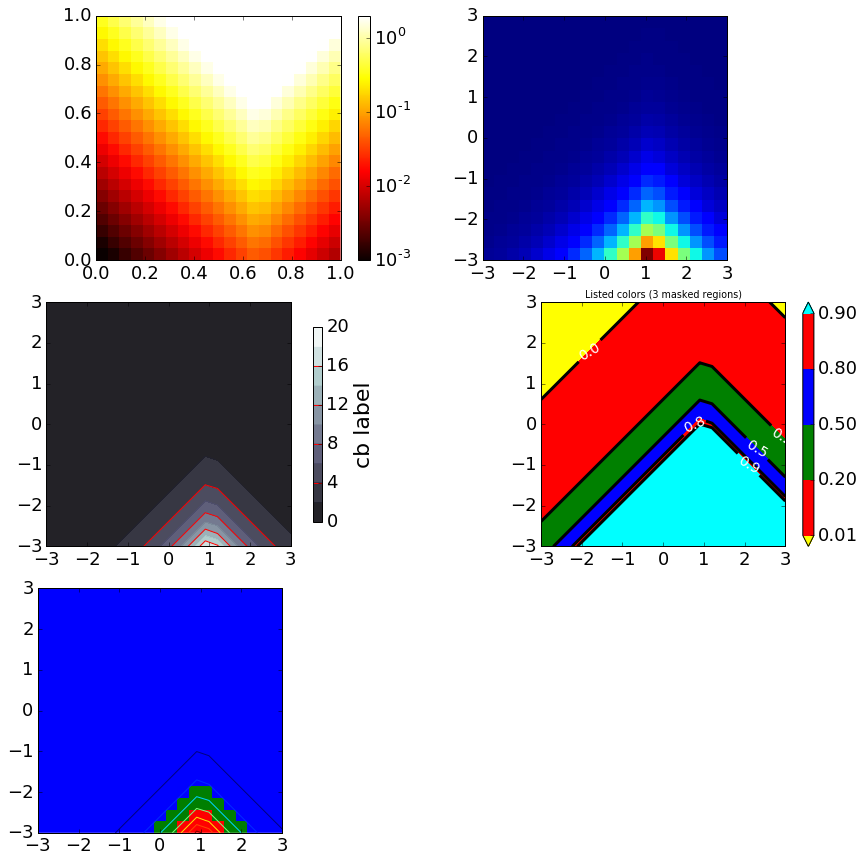

In [4]:
from matplotlib.colors import LogNorm
fig=plt.figure(1,figsize=(13,12))

x = y = np.linspace(-3.0, 3.0, 21);X, Y = np.meshgrid(x, y)
Z = np.exp(-(abs(X-1)+Y))

plt.subplot(321) #when z-value is given for every point sequentially
plt.imshow(Z,extent=(0,1,0,1),cmap=plt.cm.hot, #hot,jet
           interpolation='none',
           origin='upper', #If None, the first value of Z will correspond to the lower left corner
           vmin=.001,vmax=2, #lowest cm corresponds to vmin
           norm=LogNorm())
plt.colorbar(fraction=0.046, pad=0.04)

plt.subplot(322,aspect='equal')
plt.pcolormesh(X,Y,Z)# Plot the density map using nearest-neighbor interpolation

plt.subplot(323,aspect='equal')
CS = plt.contourf(X, Y, Z,10, #10 levels auto
                  alpha=0.9,cmap=plt.cm.bone)
CS2 = plt.contour(CS, levels=CS.levels[::2],colors='r',hold='on')
cbar = plt.colorbar(CS, shrink=0.8)
cbar.ax.set_ylabel('cb label')
cbar.add_lines(CS2)

plt.subplot(324,aspect='equal')
levels = [ 0.01, .2,.5,.8,.9]
CS3 = plt.contourf(X, Y, Z, levels,colors=('r', 'g', 'b'),extend='both')#extend (for the colormap) can be ["neither", "both", "min", "max"]
CS4 = plt.contour(X, Y, Z, levels,colors=('k',),linewidths=(3,))
CS3.cmap.set_under('yellow')# make data below the lowest contour level yellow, and above the highest level cyan
CS3.cmap.set_over('cyan')
plt.title('Listed colors (3 masked regions)')
plt.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)
plt.colorbar(CS3,fraction=0.046, pad=0.04)

plt.subplot(325,aspect='equal')
plt.contour(X, Y, Z) #default cmap is jet
plt.imshow(Z, interpolation='none', origin='lower',
           cmap=mpl.colors.ListedColormap(['b','g','r']), extent=(-3,3,-3,3))

plt.tight_layout() 
plt.show()

# Layout

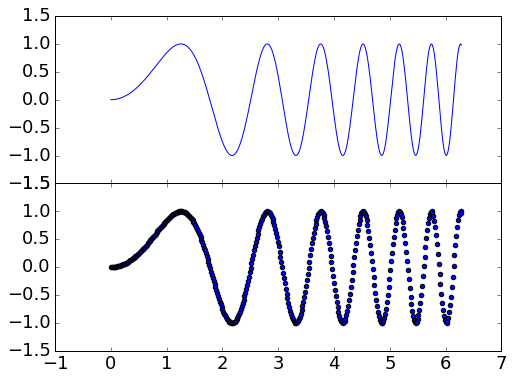

In [112]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, sharey=True,figsize=(8,6))
ax1.plot(x, y)
ax2.scatter(x, y)
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

# 3D surface 

<IPython.core.display.Javascript object>


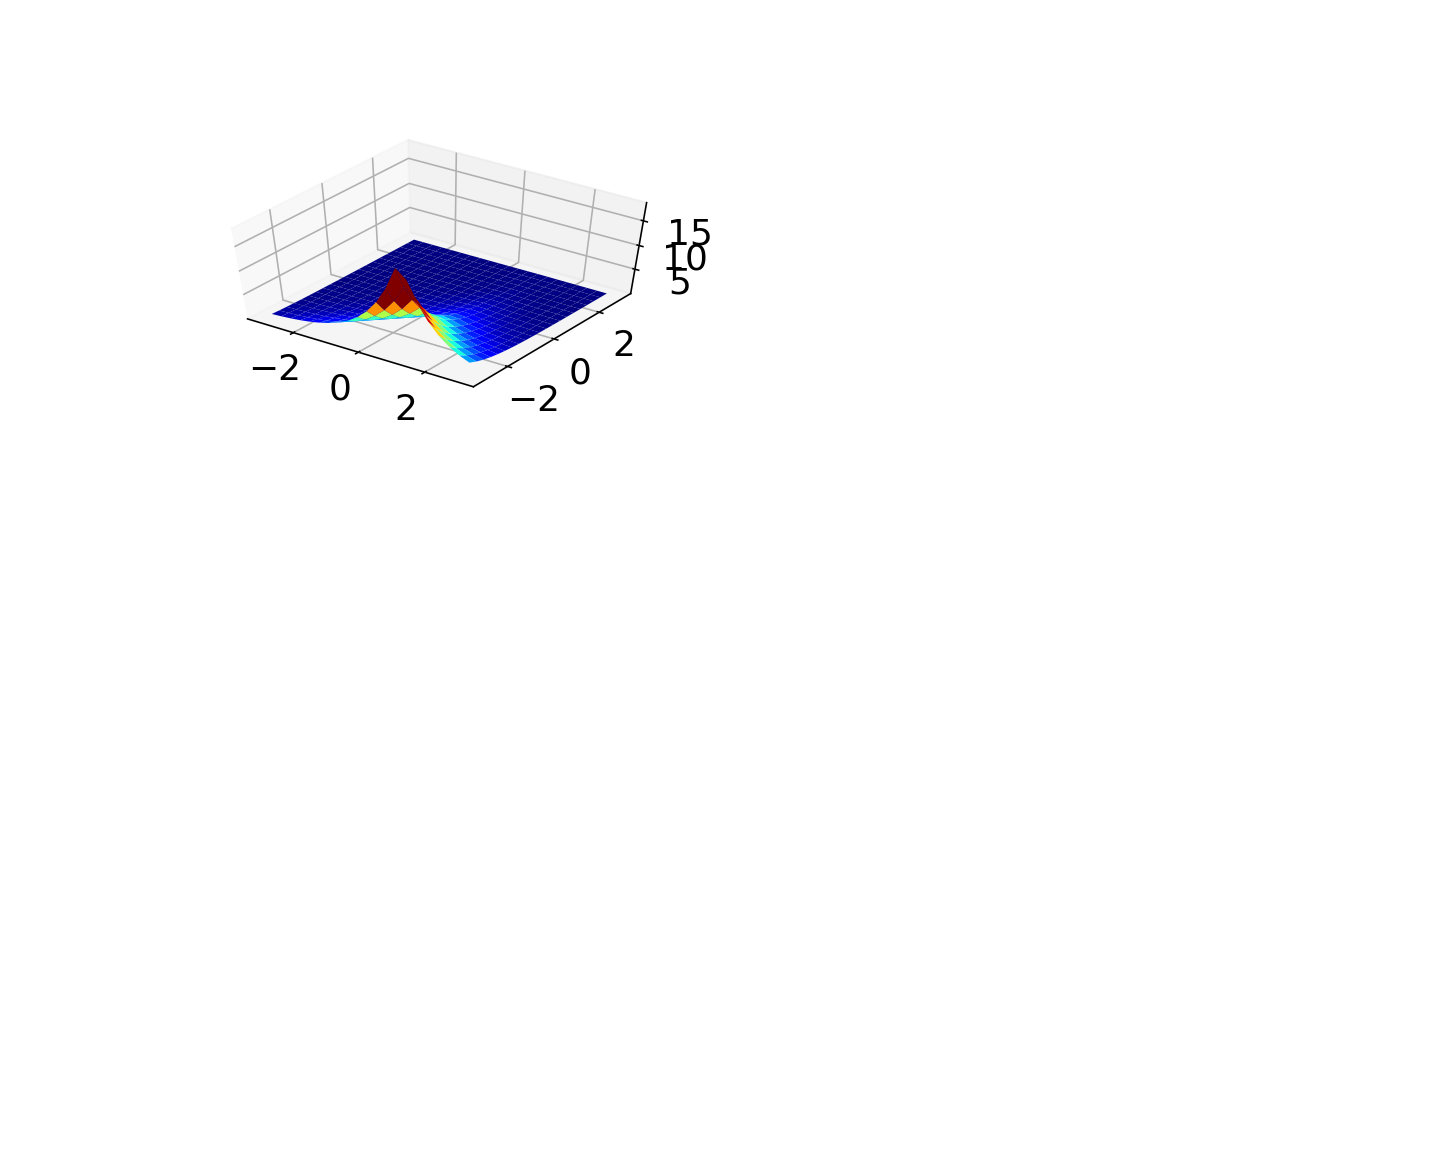

In [5]:
%matplotlib notebook
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()

x = y = np.linspace(-3.0, 3.0, 21);X, Y = np.meshgrid(x, y)
Z = np.exp(-(abs(X-1)+Y))

ax = fig.add_subplot(321, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.jet, vmax=10, vmin=0)

# Primitives / Colormaps

add _r suffix to reverse any colormap

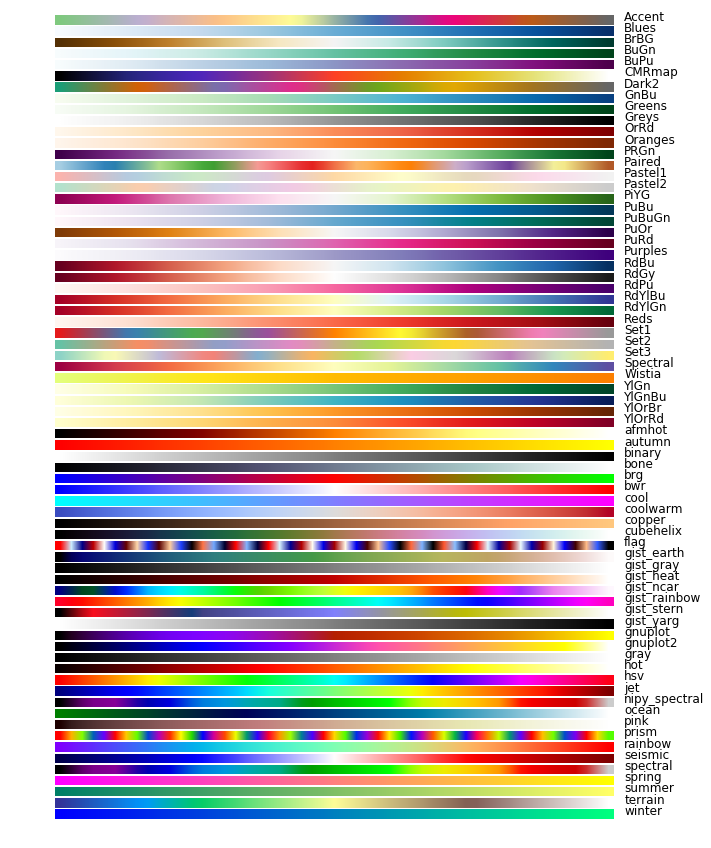

In [64]:
a=np.outer(np.ones(3),np.linspace(0,1,51))
maps=sorted([m for m in mpl.cm.datad if not m.endswith("_r")])
l=len(maps)
plt.figure(figsize=(10,l/5.))
for i, m in enumerate(maps):
    plt.subplot(l,1,i+1)
    plt.axis("off")
    plt.imshow(a,aspect='auto',cmap=plt.get_cmap(m))
    plt.title(m,fontsize=12,x=1.02,y=0,ha='left')

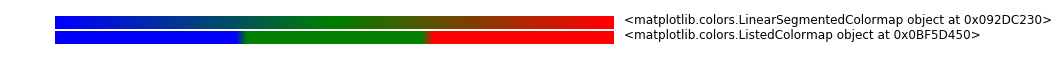

In [65]:
a=np.outer(np.ones(3),np.linspace(0,1,51)); colors=['b','g','r']
maps=[mpl.colors.LinearSegmentedColormap.from_list("BMH",colors),
             mpl.colors.ListedColormap(colors)]
l=len(maps)
plt.figure(figsize=(10,l/4.))
for i, m in enumerate(maps):
    plt.subplot(l,1,i+1)
    plt.axis("off")
    plt.imshow(a,aspect='auto',cmap=m)
    plt.title(m,fontsize=12,x=1.02,y=0,ha='left')